In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_ratio_values(file_name):
    classifications = []
    ratio_values = []
    for run in range(1,11):
        numpy_file = np.load(f'data_every10/every10frames_classification_list_{file_name}_run{run}.npy')
        classifications.append(numpy_file)
        ratio_values.append(float(str(sum(classifications[run-1])/len(classifications[run-1]))[0:5]))
        #print(numpy_file[0])
    return ratio_values,classifications #ratio_values_CH04 = get_ratio_values('CH04')

In [3]:
def quick_scatter(file_name):
    ratio_values,classifications = get_ratio_values(file_name)
    plt.figure(figsize=[1.5,2])
    plt.title(f'{file_name} {str(np.average(ratio_values))[0:5]}')
    plt.scatter(np.arange(10),ratio_values, color='gray', edgecolor='k')
    plt.ylabel('ratio')
    plt.xlabel('simulation')
    plt.yticks([0,1],[0,1])
    plt.ylim(0,1)
    plt.xticks([])
    plt.close()
    #for n in range(10):
    #    plt.figure(figsize=[5,0.7])
    #    plt.scatter(np.arange(len(classifications[n])),classifications[n], s=5)
    #    plt.title(f'{file_name}: run{n+1} {str(sum(classifications[n])/len(classifications[n]))[0:5]}', fontsize=10)
    #    plt.yticks([0,1],[0,1])
    #    plt.show
    return np.average(ratio_values), np.std(ratio_values)

avgs = []
stds = []
for file_name in ['CH04', 'Ab41328', 'V033mat', 'seq10941', 'seq10821','seq20621','seq15061','seq12552', 'seq22299', 'seq215', 'seq17216']:
    avg, std = quick_scatter(file_name)
    avgs.append(avg)
    stds.append(std)

In [4]:
def barplot_values(file_name):
    ratio_values,classifications = get_ratio_values(file_name)
    ratio_values_per_sim = np.average(ratio_values)
    return ratio_values_per_sim

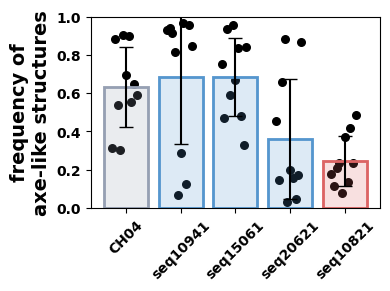

In [5]:
systems_list = ['CH04','seq10941', 'seq15061', 'seq20621', 'seq10821']
colors=     ['#96a0b3', '#5596ce', '#5596ce' ,'#5596ce' ,'#dc6464']

ratio_values_combined = []
ratio_values_avgs_combined = []
ratio_values_stds_combined = []
for file_name in systems_list:
    ratio_values,classifications = get_ratio_values(file_name)
    ratio_values_combined.append(ratio_values)
    ratio_values_avgs_combined.append(np.average(ratio_values))
    ratio_values_stds_combined.append(np.std(ratio_values))

x=np.arange(0,10,2)
fig, ax = plt.subplots(figsize=[4,3])
ax.bar(x, ratio_values_avgs_combined, width=1.6, color=colors, fill=True, linewidth=2, edgecolor=colors, alpha=0.2)
ax.bar(x, ratio_values_avgs_combined, width=1.6, color=colors, fill=False, linewidth=2, edgecolor=colors, alpha=1)

ax.errorbar(x, ratio_values_avgs_combined, yerr=ratio_values_stds_combined, fmt="none", color="k", capsize=5)

for i in range(5):
    plt.scatter(np.array([-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4])+(i*2), ratio_values_combined[i], 
                edgecolor='k',s=30, c='k')
    
plt.ylabel('frequency of\naxe-like structures', weight='bold', fontsize=14)
#plt.xlabel('Antibody', fontsize=14, weight='bold')
plt.xticks(x, systems_list, fontsize=10, weight='bold', rotation=45)
plt.yticks(fontsize=10, weight='bold')
plt.ylim(0,1)
plt.tight_layout()
plt.savefig('plots/CH01_related_barplots.pdf', dpi=300, transparent=True)
plt.show()

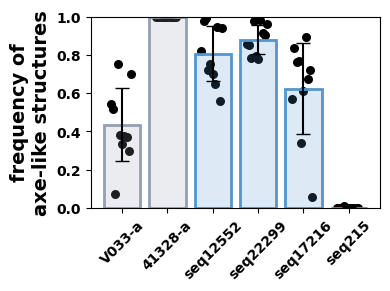

In [6]:
### systems_list = ['CH04', 'Ab41328', 'V033mat', 'seq10941', 'seq10821','seq20621','seq15061','seq12552', 'seq22299', 'seq215', 'seq17216']


systems_list = ['V033mat','Ab41328','seq12552', 'seq22299', 'seq17216', 'seq215']
systems_labels_list = ['V033-a','41328-a','seq12552', 'seq22299', 'seq17216', 'seq215']
colors=     ['#96a0b3', '#96a0b3', '#5596ce' ,'#5596ce' ,'#5596ce','#dc6464']

ratio_values_combined = []
ratio_values_avgs_combined = []
ratio_values_stds_combined = []
for file_name in systems_list:
    ratio_values,classifications = get_ratio_values(file_name)
    ratio_values_combined.append(ratio_values)
    ratio_values_avgs_combined.append(np.average(ratio_values))
    ratio_values_stds_combined.append(np.std(ratio_values))
    

x=np.arange(0,12,2)
fig, ax = plt.subplots(figsize=[4,3])
ax.bar(x, ratio_values_avgs_combined, width=1.6, color=colors, fill=True, linewidth=2, edgecolor=colors, alpha=0.2)
ax.bar(x, ratio_values_avgs_combined, width=1.6, color=colors, fill=False, linewidth=2, edgecolor=colors, alpha=1)

ax.errorbar(x, ratio_values_avgs_combined, yerr=ratio_values_stds_combined, fmt="none", color="k", capsize=5)

for i in range(6):
    plt.scatter(np.array([-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4])+(i*2), ratio_values_combined[i], 
                edgecolor='k',s=30, c='k')
    
plt.ylabel('frequency of\naxe-like structures', weight='bold', fontsize=14)
#plt.xlabel('Antibody', fontsize=14, weight='bold')
plt.xticks(x, systems_labels_list, fontsize=10, weight='bold', rotation=45)
plt.yticks(fontsize=10, weight='bold')
plt.ylim(0,1)
plt.tight_layout()
plt.savefig('plots/rhesus_related_barplots.pdf', dpi=300, transparent=True)
plt.show()